In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
from collections import Counter

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
a = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_가로수길점.csv")
b = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_구로디지털역점.csv")
c = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_대학로점.csv")
d = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_동대문두타몰점.csv")
e = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_성신여대점.csv")
f = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_신촌점.csv")
g = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_연신내역점.csv")
h = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_롤링파스타_종로점")
i = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_빽보이피자_송파헬리오시티점")
j = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_빽보이피자_연남점.csv")
k = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/네이버리뷰_뺵보이피자_건대점.csv")

In [ ]:
l = pd.read_csv("/content/drive/MyDrive/TT 텍스트마이닝 프로젝트 업로드/크롤링/양식/유튜브_빽보이피자.csv")
l = l[["comments",'date']]
l.rename(columns={"comments":"Review",
                  "date" : "Date"},inplace=True)
l = l.dropna()

In [ ]:
l['Date'] = pd.to_datetime(l['Date']).dt.strftime("%Y-%m")
l['Year'] = l['Date'].str.split("-").str[0].astype(int)
l['Month'] = l['Date'].str.split("-").str[-1].astype(int)
youtube = l.drop(columns = ['Date'])

In [ ]:
df_list = [a,b,c,d,e,f,g,h,i,j,k]
naver = pd.concat(df_list,ignore_index=True)
naver['Date'] = naver['Date'].apply(lambda x : ' '.join(x.split()[:-2]))
naver['Year'] = naver['Date'].str.split("년").str[0].astype(int)
naver['Month'] = naver['Date'].str.split("년").str[-1].str.strip("월").astype(int)
naver2 = naver.drop(columns=['Date'])

In [ ]:
lists = [youtube,naver2]
reviews = pd.concat(lists,ignore_index=True)
reviews.isnull().sum()

Review    216
Year        0
Month       0
dtype: int64

In [ ]:
reviews = reviews.dropna()

In [ ]:
df_20 = reviews[reviews['Year'] == 2020]
df_21 = reviews[reviews['Year'] == 2021]
df_22 = reviews[reviews['Year'] == 2022]
df_23 = reviews[reviews['Year'] == 2023]
df_24 = reviews[reviews['Year'] == 2024]
df_22

In [ ]:
!pip install konlpy

In [ ]:
import re
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

2020

In [ ]:
text= df_20['Review'].astype('str').values.tolist()
pattern = r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'
clean_text = [sentence for sentence in text if not re.search(pattern,sentence)]

a = []
for i in clean_text:
    a.append(i.replace('가성비',"양귀비"))

In [ ]:
noun_text = []
for i in a:
    if len(i) > 3:
        noun_text.append(kkma.nouns(i))

In [ ]:
noun_text = sum(noun_text,[])

In [ ]:
noun_text

In [ ]:
keywords = ['이벤트','대중적','혜자','젊은이','소개팅','데이트코스','합리적','행복세트','시스템','양귀비','서비스','청결','웨이팅','분위기','친절','맛','가격대비']

words = {}
for word in noun_text:
    if word in keywords:
        words[word] = words.get(word,0) + 1

words

In [ ]:
sorted_20 = sorted(words.items(), reverse=True, key=lambda kv: kv[1])

df_20 = pd.DataFrame(sorted_20, columns=['명사', '2020'])

df_temp_20 = df_20.T
df_temp_20.columns = df_temp_20.iloc[0]
df_temp_20.drop(df_temp_20.index[0], inplace=True)
df_temp_20 = df_temp_20.rename(columns = {"양귀비" : "가성비"})

plt.figure(figsize=(100, 60))
df_temp_20.plot(kind='bar', stacked=True)

2021

In [ ]:
text_21 = df_21['Review'].astype('str').values.tolist()
pattern_21 = r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'
clean_text_21 = [sentence for sentence in text_21 if not re.search(pattern_21,sentence)]

a_21 = []
for i in clean_text_21:
    a_21.append(i.replace('가성비',"양귀비"))

noun_text_21 = []
for i in a_21:
    noun_text_21.append(kkma.nouns(i))

noun_text_21 = sum(noun_text_21,[])

keywords_21 = ['서비스','가격대비','크림파스타','친절','이색적','와인','분위기','간장삼겹파스타','포장','퀄리티','대학로','방역','고급','합리적','마스크','양귀비']

words_21 = {}
for word in noun_text_21:
    if word in keywords_21:
        words_21[word] = words_21.get(word,0) + 1

words_21
sorted_w = sorted(words_21.items(), reverse=True, key=lambda kv: kv[1])
sorted_w

In [ ]:
df_21 = pd.DataFrame(sorted_w, columns=['명사', '2021'])

df_temp_21 = df_21.T
df_temp_21.columns = df_temp_21.iloc[0]
df_temp_21.drop(df_temp_21.index[0], inplace=True)
df_temp_21 = df_temp_21.rename(columns = {"양귀비" : "가성비"})

plt.figure(figsize=(100, 60))
df_temp_21.plot(kind='bar', stacked=True)

2022

In [ ]:
text_22 = df_22['Review'].astype('str').values.tolist()
pattern_22 = r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'
clean_text_22 = [sentence for sentence in text_22 if not re.search(pattern_22,sentence)]

a_22 = []
for i in clean_text_22:
    a_22.append(i.replace('가성비',"양귀비"))

noun_text_22 = []
for i in a_22:
    noun_text_22.append(kkma.nouns(i))

noun_text_22 = sum(noun_text_22,[])

keywords_22 = ['양귀비','가격대비','친절','분위기','퀄리티','서비스','재방문','로제','혼밥']

words_22 = {}
for word in noun_text_22:
    if word in keywords_22:
        words_22[word] = words_22.get(word,0) + 1

sorted_22 = sorted(words_22.items(), reverse=True, key=lambda kv: kv[1])
sorted_22

In [ ]:
df_22 = pd.DataFrame(sorted_22, columns=['명사', '2022'])

df_temp_22 = df_22.T
df_temp_22.columns = df_temp_22.iloc[0]
df_temp_22.drop(df_temp_22.index[0], inplace=True)
df_temp_22 = df_temp_22.rename(columns = {"양귀비" : "가성비"})

plt.figure(figsize=(100, 60))
df_temp_22.plot(kind='bar', stacked=True)

2023

In [ ]:
text_23 = df_23['Review'].astype('str').values.tolist()
pattern_23 = r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'
clean_text_23 = [sentence for sentence in text_23 if not re.search(pattern_23,sentence)]

a_23 = []
for i in clean_text_23:
    a_23.append(i.replace('가성비',"양귀비"))

noun_text_23 = []
for i in a_23:
    noun_text_23.append(kkma.nouns(i))

noun_text_23 = sum(noun_text_23,[])

keywords_23 = ['양귀비','가격대비','친절','분위기','퀄리티','서비스','재방문','로제','혼밥가능','합리적','찹스테이크','최애조합','재방문','자주','동네맛집발견']

words_23 = {}
for word in noun_text_23:
    if word in keywords_23:
        words_23[word] = words_23.get(word,0) + 1

sorted_23 = sorted(words_23.items(), reverse=True, key=lambda kv: kv[1])
sorted_23

In [ ]:
df_23 = pd.DataFrame(sorted_23, columns=['명사', '2023'])

df_temp_23 = df_23.T
df_temp_23.columns = df_temp_23.iloc[0]
df_temp_23.drop(df_temp_23.index[0], inplace=True)
df_temp_23 = df_temp_23.rename(columns = {"양귀비" : "가성비"})

plt.figure(figsize=(100, 60))
df_temp_23.plot(kind='bar', stacked=True)

2024

In [ ]:
text_24 = df_24['Review'].astype('str').values.tolist()
pattern_24 = r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'
clean_text_24 = [sentence for sentence in text_24 if not re.search(pattern_24,sentence)]

a_24 = []
for i in clean_text_24:
    a_24.append(i.replace('가성비',"양귀비"))

noun_text_24 = []
for i in a_24:
    noun_text_24.append(kkma.nouns(i))

noun_text_24 = sum(noun_text_24,[])

keywords_24 = ['양귀비','가격대비','친절','분위기','퀄리티','서비스','재방문','로제','혼밥가능','합리적','경쟁력','위생','기습점검','토핑']

words_24 = {}
for word in noun_text_24:
    if word in keywords_24:
        words_24[word] = words_24.get(word,0) + 1

sorted_24 = sorted(words_24.items(), reverse=True, key=lambda kv: kv[1])
sorted_24

In [ ]:
df_24 = pd.DataFrame(sorted_24, columns=['명사', '2024'])

df_temp_24 = df_24.T
df_temp_24.columns = df_temp_24.iloc[0]
df_temp_24.drop(df_temp_24.index[0], inplace=True)
df_temp_24 = df_temp_24.rename(columns = {"양귀비" : "가성비"})

plt.figure(figsize=(100, 60))
df_temp_24.plot(kind='bar', stacked=True)

In [ ]:
plt.figure(figsize=(24,6))

ax0 = plt.subplot(1,5,1)
df_temp_20.plot(kind='bar', stacked=True, ax=ax0)
plt.title('DataFrame 20')

ax1 = plt.subplot(1,5,2)
df_temp_21.plot(kind='bar', stacked=True, ax=ax1)
plt.title('DataFrame 21')

ax2= plt.subplot(1,5,3)
df_temp_22.plot(kind='bar', stacked=True, ax=ax2)
plt.title('DataFrame 22')

ax3 = plt.subplot(1,5,4)
df_temp_23.plot(kind='bar', stacked=True, ax=ax3)
plt.title('DataFrame 23')

ax4 = plt.subplot(1,5,5)
df_temp_24.plot(kind='bar', stacked=True, ax=ax4)
plt.title('DataFrame 24')

plt.show()

In [ ]:
cafe = pd.read_csv("/content/caffereviews.csv")
cat = [cafe,reviews]
total1 = pd.concat(cat,ignore_index=True)

In [ ]:
a = pd.read_csv("/content/역전우동.csv")
b = pd.read_csv("/content/연돈.csv")
a_b = [a,b]
total2 = pd.concat(a_b,ignore_index=True)
total2 = total2.drop(columns = ['Quarter'])
total2.rename(columns={"comment":"Review"},inplace=True)
cat_list = [total1,total2]
total = pd.concat(cat_list,ignore_index=True)

# 워드클라우드

In [ ]:
reviews['Review']

0                                                     쉣더빽
1                                        자기한테도 좀 엄격해지세요..
2       영상처럼절대안나옵니다 싼것ㅅ도아니고 치즈도 올리자말았는지 도우는 씬피자시킨줄알았습니...
3               대파크림 감자라떼에 열탄불고기 피자라 생각만 해도 ..... ㅋㅋㅋㅋㅋ^^
4       너무 맛있던데~도우도 얇고 요새 동네피자 스파게티까지 시키면<br>3만원 넘음 빽보...
                              ...                        
6921                                 역시 가성비 가심비 울리는 맛과 토핑
6922    오늘 오픈해서 기대와 함께 방문!! 뚜둥- 기대를 너무 했나? 맛은 있지만 가성비는...
6923                            다좋은듯한데 좀짠맛 조금 나트륨을 줄여주세용~
6924        오픈전 공사때부터 기다렸는데 드디어 먹어보네요 동네피자 중에는 탑인것 같네요 ^^
6925                                           오마이갓~ 풰풔로니
Name: Review, Length: 6710, dtype: object

In [ ]:
import re

def text_clean(text):
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    pattern = '[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'    # 한글만 뽑기
    text = re.sub(pattern, '', text)
    return text

In [ ]:
x = reviews['Review'].astype('str').values.tolist()
corpus = list(map(lambda x : text_clean(x), x))

In [ ]:
text = []  # 결과를 저장할 리스트

for i in corpus:
    # 각각의 키워드를 대상으로 바꿔치기를 수행하여 그 결과를 하나의 문장으로 합쳐서 저장
    replaced_sentence = i.replace('가성비','양귀비').replace('백종원','탕수육').replace('빽보이','자장면')
    text.append(replaced_sentence)

In [ ]:
text = [sentence.strip() for sentence in text if sentence.strip()]

In [ ]:
token = list(map(lambda x : kkma.morphs(x),text))

In [ ]:
tokens = []
for i in token:
    a = []
    for j in i:
        if len(j) >=2:
            a.append(j)
    tokens.append(a)

In [ ]:
tokens = sum(tokens,[])

In [ ]:
stopwords = """
자기
한테
세요
처럼
나오
ㅂ니다
아니
는지
올리
습니다
시키
어도
맛있
던데
우도
까지
시키
보이
지방
에서
진짜
어요
거기
까지
크으
뭐하
만들
프렌
ㄴ데
보다
는데
ㄹ까
빠지
버리
라구요
깔리
어서
지만
으면
ㄹ까
터지
아서
어도
지만
던데
너무
아요
네요
정도
에요
으로
정말
그냥
어야
다른
많이
"""

In [ ]:
tokens = [word for word in tokens if word not in stopwords]

In [ ]:
tokens = ['가성비' if word == '양귀비' else '백종원' if word == '탕수육' else '빽보이' if word == '자장면' else word for word in tokens]

In [ ]:
vocab = Counter(tokens)
vocab

Counter({'엄격': 1,
         '영상': 75,
         '절대': 12,
         '치즈': 158,
         '피자': 1039,
         '재료': 27,
         '부족': 25,
         '한번': 81,
         '대파': 3,
         '크림': 215,
         '감자': 11,
         '불고기': 61,
         '생각': 158,
         '요새': 6,
         '동네': 110,
         '스파게티': 80,
         '만원': 39,
         '빽보이': 304,
         '가성비': 893,
         '최고': 111,
         '원조': 2,
         '밥집': 12,
         '서울': 11,
         '상경': 1,
         '처음': 114,
         '논현동': 2,
         '아직': 27,
         '추억': 6,
         '해물': 28,
         '추가': 92,
         '싱싱': 2,
         '고기밥': 1,
         '말해': 3,
         '음식': 366,
         '하향': 2,
         '평준화': 2,
         '백종원': 279,
         '이즈': 66,
         '솔직히': 66,
         '가격': 597,
         '대비': 116,
         '라지': 17,
         '엄청': 96,
         '꽤나': 5,
         '그리하': 91,
         '용량': 2,
         '치고': 3,
         '줬으면': 1,
         '대놓': 5,
         '광고': 35,
         '호감': 2,
         '종로': 22,
    

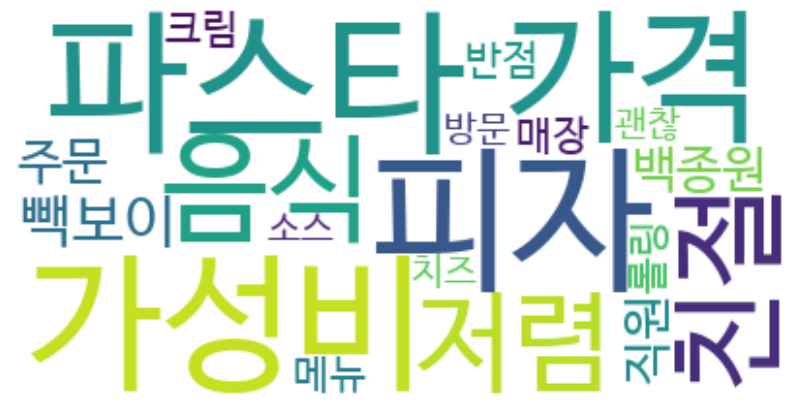

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

top_vocab = vocab.most_common(20)

# 튜플의 리스트에서 단어만 추출하여 문자열로 변환
top_vocab_str = ' '.join([word for word, freq in top_vocab])

# 워드클라우드 생성
wc = WordCloud(font_path='NanumBarunGothic.ttf',background_color='white')
wordcloud = wc.generate(top_vocab_str)

# 시각화
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# LDA

In [ ]:
import re

def text_clean(text):
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    pattern = '[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'    # 한글만 뽑기
    text = re.sub(pattern, '', text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence '\w'
<>:10: DeprecationWarning: invalid escape sequence '\s'
<>:8: DeprecationWarning: invalid escape sequence '\w'
<>:10: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-168-0dc178768351>:8: DeprecationWarning: invalid escape sequence '\w'
  pattern = '[^\w\s]'         # 특수기호제거
<ipython-input-168-0dc178768351>:10: DeprecationWarning: invalid escape sequence '\s'
  pattern = '[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'    # 한글만 뽑기


In [ ]:
x = reviews['Review'].astype('str').values.tolist()
corpus = list(map(lambda x : text_clean(x), x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = []  # 결과를 저장할 리스트

for i in corpus:
    # 각각의 키워드를 대상으로 바꿔치기를 수행하여 그 결과를 하나의 문장으로 합쳐서 저장
    replaced_sentence = i.replace('가성비','양귀비').replace('백종원','탕수육').replace('빽보이','자장면')
    text.append(replaced_sentence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_text = [sentence.strip() for sentence in text if sentence.strip()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token = list(map(lambda x : kkma.morphs(x),filtered_text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words = """아
자기
한테
세요
처럼
나오
ㅂ니다
아니
는지
올리
습니다
시키
어도
맛있
던데
우도
까지
시키
보이
지방
에서
진짜
어요
거기
까지
크으
뭐하
만들
프렌
ㄴ데
보다
는데
ㄹ까
빠지
버리
라구요
깔리
어서
지만
으면
ㄹ까
터지
아서
어도
지만
던데
너무
아요
네요
정도
에요
으로
정말
그냥
어야
다른
많이
의
가
이
은
들
는
좀
잘
걍
과
도
를
으로
자
에
와
한
하다
도
좀
한테
하
어
지
세요
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면
인젠
이젠
된바에야
된이상
만큼	어찌됏든
그위에
게다가
점에서 보아
비추어 보아
고려하면
하게될것이다
일것이다
비교적
좀
보다더
비하면
시키다
하게하다
할만하다
의해서
연이서
이어서
잇따라
뒤따라
뒤이어
결국
의지하여
기대여
통하여
자마자
더욱더
불구하고
얼마든지
마음대로
주저하지 않고
곧
즉시
바로
당장
하자마자
밖에 안된다
하면된다
그래
그렇지
요컨대
다시 말하자면
바꿔 말하면
즉
구체적으로
말하자면
시작하여
시초에
이상
허
헉
허걱
바와같이
해도좋다
해도된다
게다가
더구나
하물며
와르르
팍
퍽
펄렁
동안
이래
하고있었다
이었다
에서
로부터
까지
예하면
했어요
해요
함께
같이
더불어
마저
마저도
양자
모두
습니다
가까스로
하려고하다
즈음하여
다른
다른 방면으로
해봐요
습니까
했어요
말할것도 없고
무릎쓰고
개의치않고
하는것만 못하다
하는것이 낫다
매
매번
들
모
어느것
어느
로써
갖고말하자면
어디
어느쪽
어느것
어느해
어느 년도
라 해도
언젠가
어떤것
어느것
저기
저쪽
저것
그때
그럼
그러면
요만한걸
그래
그때
저것만큼
그저
이르기까지
할 줄 안다
할 힘이 있다
너
너희
당신
어찌
설마
차라리
할지언정
할지라도
할망정
할지언정
구토하다
게우다
토하다
메쓰겁다
옆사람
퉤
쳇
의거하여
근거하여
의해
따라
힘입어
그
다음
버금
두번째로
기타
첫번째로
나머지는
그중에서
견지에서
형식으로 쓰여
입장에서
위해서
단지
의해되다
하도록시키다
뿐만아니라
반대로
전후
전자
앞의것
잠시
잠깐
하면서
그렇지만
다음에
그러한즉
그런즉
남들
아무거나
어찌하든지
같다
비슷하다
예컨대
이럴정도로
어떻게
만약
만일
위에서 서술한바와같이
인 듯하다
하지 않는다면
만약에
무엇
무슨
어느
어떤
아래윗
조차
한데
그럼에도 불구하고
여전히
심지어
까지도
조차도
하지 않도록
않기 위하여
때
시각
무렵
시간
동안
어때
어떠한
하여금
네
예
우선
누구
누가 알겠는가
아무도
줄은모른다
줄은 몰랏다
하는 김에
겸사겸사
하는바
그런 까닭에
한 이유는
그러니
그러니까
때문에
그
너희
그들
너희들
타인
것
것들
너
위하여
공동으로
동시에
하기 위하여
어찌하여
무엇때문에
붕붕
윙윙
나
우리
엉엉
휘익
윙윙
오호
아하
어쨋든
만 못하다	하기보다는
차라리
하는 편이 낫다
흐흐
놀라다
상대적으로 말하자면
마치
아니라면
쉿
그렇지 않으면
그렇지 않다면
안 그러면
아니었다면
하든지
아니면
이라면
좋아
알았어
하는것도
그만이다
어쩔수 없다
하나
일
일반적으로
일단
한켠으로는
오자마자
이렇게되면
이와같다면
전부
한마디
한항목
근거로
하기에
아울러
하지 않도록
않기 위해서
이르기까지
이 되다
로 인하여
까닭으로
이유만으로
이로 인하여
그래서
이 때문에
그러므로
그런 까닭에
알 수 있다
결론을 낼 수 있다
으로 인하여
있다
어떤것
관계가 있다
관련이 있다
연관되다
어떤것들
에 대해
이리하여
그리하여
여부
하기보다는
하느니
하면 할수록
운운
이러이러하다
하구나
하도다
다시말하면
다음으로
에 있다
에 달려 있다
우리
우리들
오히려
하기는한데
어떻게
어떻해
어찌됏어
어때
어째서
본대로
자
이
이쪽
여기
이것
이번
이렇게말하자면
이런
이러한
이와 같은
요만큼
요만한 것
얼마 안 되는 것
이만큼
이 정도의
이렇게 많은 것
이와 같다
이때
이렇구나
것과 같이
끼익
삐걱
따위
와 같은 사람들
부류의 사람들
왜냐하면
중의하나
오직
오로지
에 한하다
하기만 하면
도착하다
까지 미치다
도달하다
정도에 이르다
할 지경이다
결과에 이르다
관해서는
여러분
하고 있다
한 후
혼자
자기
자기집
자신
우에 종합한것과같이
총적으로 보면
총적으로 말하면
총적으로
대로 하다
으로서
참
그만이다
할 따름이다
쿵
탕탕
쾅쾅
둥둥
봐
봐라
아이야
아니
와아
응
아이
참나
년
월
일
령
영
일
이
삼
사
오
육
륙
칠
팔
구
이천육
이천칠
이천팔
이천구
하나
둘
셋
넷
다섯
여섯
일곱
여덟
아홉
령
ㄴ데
영
쉣
대비
반점
대표
맛있
한번
제주
제주도
ㄴ데
양도
추가
아요
보이
은데
주세
짬뽕
느낌
오늘
지점
도리아
이즈
나라
가요
근처
테이크
있음
찹스
스테이크
조르
괜찮
처음
완전
오스
양이
아주
모르
ㄴ지
가보
ㄹ게요
느끼
리오
고르
좋아하
자주
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token_ = [[word for word in sentence if word not in stop_words] for sentence in token]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token_2 = [kkma.nouns(' '.join(sentence)) for sentence in token_]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token_2 = [[word for word in sentence if word not in stop_words] for sentence in token]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token_2 = [[word for word in sentence if word] for sentence in token_2 if sentence]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word_lists = []
for i in token_2:
    b = []
    for j in i:
        replaced_word = '가성비' if j == '양귀비' else '빽보이' if j == '자장면' else '백종원' if j == '탕수육' else j
        b.append(replaced_word)
    word_lists.append(b)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clean_ = []
for i in word_lists:
    clean_1=[]
    for j in i:
        if len(j)>=2:
            clean_1.append(j)
    clean_.append(clean_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clean_ = [[word for word in sentence if word] for sentence in clean_ if sentence]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(clean_)):
    t = ' '.join(clean_[i])
    detokenized_doc.append(t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vectorizer = TfidfVectorizer(max_features= 1000)
X = vectorizer.fit_transform(detokenized_doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('TF-IDF 행렬의 크기 :',X.shape)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)

In [ ]:
lda_model.perplexity(X)

In [ ]:
scores = []
for i in range(1,3):
    lda_model = LatentDirichletAllocation(n_components=i, random_state=1004)
    lda_model.fit(X)
    scores.append(lda_model.perplexity(X))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'  # Matplotlib 폰트 설정

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install -U pyLDAvis

In [ ]:
# LDA 시각화를 진행해봅시다.
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(
                        lda_model = lda_model,
                       dtm = X,
                       vectorizer = vectorizer,
                       mds='tsne')
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 클러스터링 만들기(양식)

정규표현식

In [ ]:
import re

def text_clean(text):
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    pattern = '[^ㄱ-ㅎㅏ-ㅣ가-힣\s]'    # 한글만 뽑기
    text = re.sub(pattern, '', text)
    return text

In [ ]:
x = reviews['Review'].astype('str').values.tolist()
corpus = list(map(lambda x : text_clean(x), x))
corpus

In [ ]:
change = []
for i in corpus:
    i.replace("가성비","바나나")
    i.replace("원조","딸기")
    change.append(i)

In [ ]:
change

형태소 추출

In [ ]:
token = list(map(lambda x : okt.morphs(x),change))
token

In [ ]:
morphs = list(map(lambda x : " ".join(x), token))

In [ ]:
morphs

불용어 처리

In [ ]:
stop_words = "은 이 의 다 에 면 으로 요 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 만큼 아 으로 던 다 에 이 것 는 가,쉣더백,자기,한테,도,좀,처럼,안나,읍니다,아니고,도,말았는지,는,씬먹고안,에,열,탄,라,만,해도,우도,까지,보이는,먹고안,에서,후,곳,이,그,과,은,크으말해,뭐해,타,나,짬,은,음,본,중단,대,것,음,자,가,슬,로,의"
stop_words = stop_words.split(' ')
stop_words

BOW 만들기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vector = CountVectorizer(stop_words = stop_words)
bow = vector.fit_transform(morphs)
print(bow.toarray())
print(vector.vocabulary_)

In [ ]:
# 딕셔너리 데이터를 쌍(items(key, value))으로 불러와 두 번째 값(value)으로 정렬해 컬럼명을 만듦
columns = []
for k, v in sorted(vector.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns) # DTM 만들기
df

In [ ]:
df_tdm = df.T

In [ ]:
df_tdm

In [ ]:
df_tdm['total'] = df_tdm.sum(axis=1)     # 단어 총 빈도수 계산
df_words = df_tdm[df_tdm['total'].rank(ascending=False) <= 50] # 빈도수 상위 50개 추출
df_words= df_words.drop('total', axis=1)    # 컬럼 'total' 제거
df_words[:5]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# ﻿'메뉴' => '런타임' => '런타임 다시 시작'

In [ ]:
kmeans = KMeans(n_clusters= 3)   # default: euclidean 거리
predict = kmeans.fit_predict(df_words)    # k-means 분석으로 군집 3개 분리(0, 1, 2)
df_words['predict'] = predict             # 해당 군집값(0, 1, 2)을 원본 데이터에 붙이기
print(df_words[:5])

In [ ]:
# 주성분 분석(PCA)을 이용해 단어별 x, y 좌표 얻기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)                         # 2차원 PCA 모델 설정
word_pca = pca.fit_transform(df_words.iloc[0:, :-1])    # 군집 변수('predict')를 제외하고 PCA 실행)
df_pca = pd.DataFrame(data=word_pca, index=[df_words.index], columns=['main1', 'main2'])
df_pca['predict']= predict
df_pca.tail()

,main1,main2,predict
피자,40.991593,-2.918741,0
하고,-1.495863,-2.319759,1
하는,-2.192905,-2.375753,1
해서,-0.176052,-2.037597,1
홍콩,-2.884805,-3.651858,1


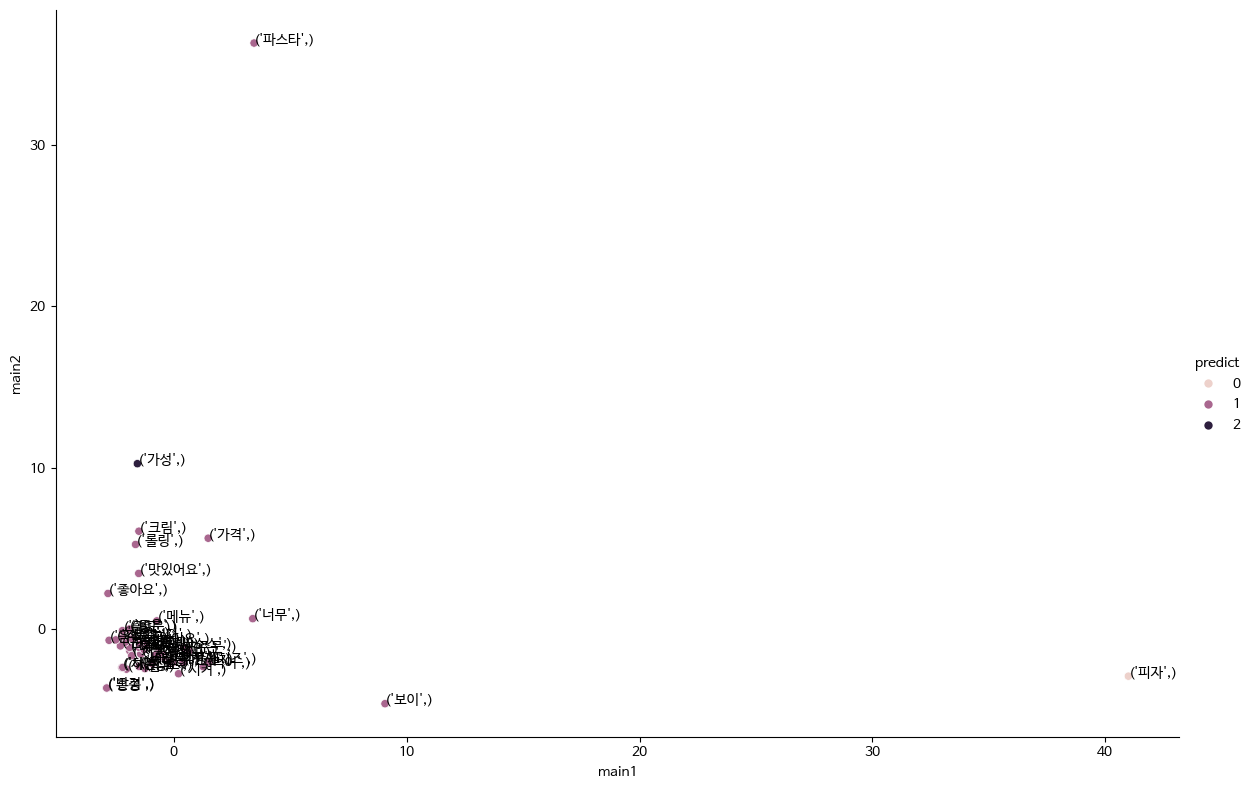

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn을 이용해 산점도 그리기
sns.relplot(x='main1', y='main2', data=df_pca, height=8, aspect=1.5, hue='predict')


# 산점도에 라벨링하기
for i, index in enumerate(df_pca.index):
  plt.text(df_pca.main1[i], df_pca.main2[i], index)